# Занятие 3

###### Изучаем ML: Уменьшение размерности
######  Нормализация
###### Энкодинг
###### Работа с реальным кейсом по навыкам Пандас (Предобработка, обработка, АБС анализ)

# Уменьшение Размерности (Обобщение)


###### «Собирает конкретные признаки в абстракции более высокого уровня»



Сегодня используют для:

    Рекомендательные Системы (★)
    Красивые визуализации
    Определение тематики и поиска похожих документов
    Анализ фейковых изображений (https://vas3k.ru/blog/390/)
    Риск-менеджмент

    Популярные алгоритмы: 
        Метод главных компонент (PCA), 
        Сингулярное разложение (SVD), 
        Латентное размещение Дирихле (LDA),
        Латентно-семантический анализ (LSA, pLSA, GLSA),
        t-SNE (для визуализации)

Изначально это были методы хардкорных Data Scientist'ов, которым сгружали две фуры цифр и говорили найти там что-нибудь интересное. Когда просто строить графики в экселе уже не помогало, они придумали напрячь машины искать закономерности вместо них. Так у них появились методы, которые назвали Dimension Reduction или Feature Learning.


Для нас практическая польза их методов в том, что мы можем объединить несколько признаков в один и получить абстракцию. Например, собаки с треугольными ушами, длинными носами и большими хвостами соединяются в полезную абстракцию «овчарки». Да, мы теряем информацию о конкретных овчарках, но новая абстракция всяко полезнее этих лишних деталей. Плюс, обучение на меньшем количестве размерностей идёт сильно быстрее.

Инструмент на удивление хорошо подошел для определения тематик текстов (Topic Modelling). Мы смогли абстрагироваться от конкретных слов до уровня смыслов даже без привлечения учителя со списком категорий. Алгоритм назвали Латентно-семантический анализ (LSA), и его идея была в том, что частота появления слова в тексте зависит от его тематики: в научных статьях больше технических терминов, в новостях о политике — имён политиков. Да, мы могли бы просто взять все слова из статей и кластеризовать, как мы делали с ларьками выше, но тогда мы бы потеряли все полезные связи между словами, например, что батарейка и аккумулятор, означают одно и то же в разных документах.

Точность такой системы — полное дно, даже не пытайтесь.

Нужно как-то объединить слова и документы в один признак, чтобы не терять эти скрытые (латентные) связи. Отсюда и появилось название метода. Оказалось, что Сингулярное разложение (SVD) легко справляется с этой задачей, выявляя для нас полезные тематические кластеры из слов, которые встречаются вместе.

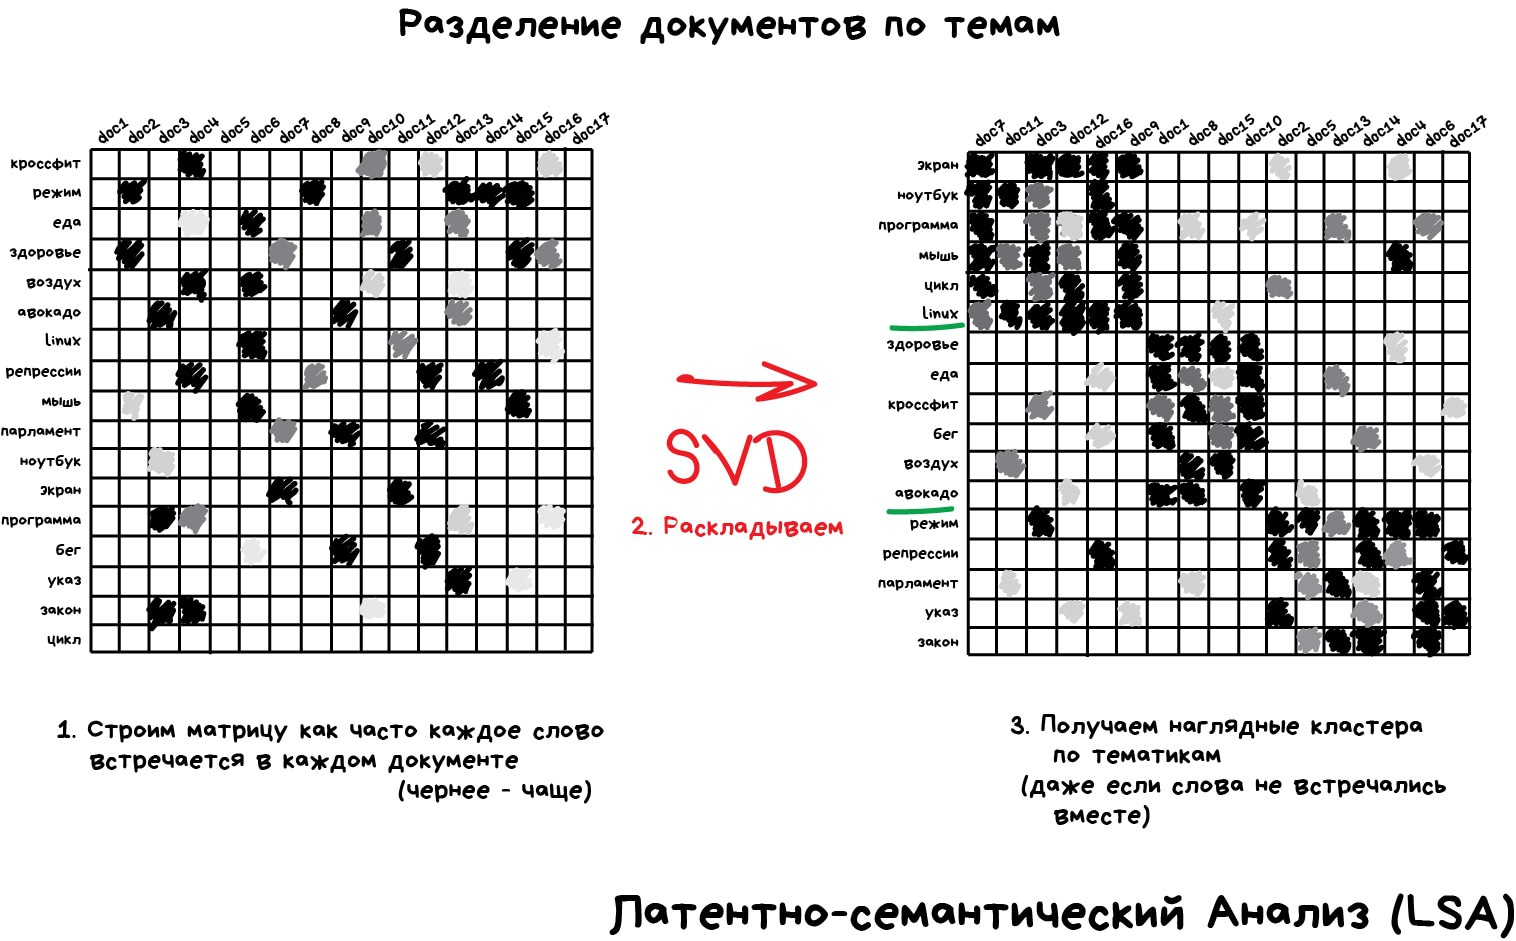

Сингуля́рное разложе́ние — определённого типа разложение прямоугольной матрицы, имеющее широкое применение, в силу своей наглядной геометрической интерпретации, при решении многих прикладных задач. Переформулировка сингулярного разложения, так называемое разложение Шмидта, имеет приложения в квантовой теории информации, например, в запутанности.

Например у нас есть матрица, состоящая из рейтингов (лайков, фактов покупки и т.п.), которые пользователи (строки матрицы) присвоили продуктам (столбцы матрицы). Давайте присмотримся к матрице image, в которой записаны известные нам рейтинги. Как правило, один пользователь не сможет оценить значительную долю продуктов, и вряд ли будет много продуктов, которые готова оценить значительная доля пользователей. Это значит, что матрица R разреженная (sparse); нельзя ли этим как-нибудь воспользоваться?



Главным инструментом для нас станет так называемое сингулярное разложение матрицы R:



Сингулярное разложение – это достаточно простой, но очень мощный инструмент. Собственно, это один из главных с практической точки зрения результатов линейной алгебры, и результат уже весьма не новый (свойства SVD были изучены самое позднее в 1930-х годах), – и тем удивительнее бывает, когда университетские курсы линейной алгебры, довольно подробные в каких-то других аспектах, совершенно обходят SVD стороной.

если R – матрица большого размера N x M, но малого ранга f (в частности, разреженные матрицы часто бывают малого ранга), её можно разложить в произведение матрицы N x f и матрицы f x M, тем самым резко сократив число параметров, c NM до (N+M)f (чтобы понять, что это большой прогресс, представьте, что, как это обычно бывает на практике, N и M измеряются сотнями тысяч и миллионами, а f меньше десятка).

SVD очень широко употребляется в машинном обучении; фактически, если вы хотите что-то чем-то приблизить, не исключено, что вам где-то по дороге встретится SVD. Классический пример применения SVD – шумоподавление, например, в изображениях.

В случае рекомендательных систем получается, что мы представляем каждого пользователя вектором из f факторов image и представляем каждый продукт вектором из f факторов image, а потом, чтобы предсказать рейтинг пользователя i товару j, берём их скалярное произведение. Можно сказать, что вектор факторов пользователя показывает, насколько пользователю нравится или не нравится тот или иной фактор, а вектор факторов продукта показывает, насколько тот или иной фактор в продукте выражен. Линейная же алгебра подсказывает нам, что для разреженной матрицы рейтингов такое разложение часто возможно и имеет содержательный смысл.

Может оказаться, кстати, что некоторые факторы легко будет понять человеческим умом: для фильмов может выделиться что-нибудь в духе «комедия–драма», «доля action'а», «доля романтики» и т.п., а факторы пользователей, соответственно, будут показывать, насколько соответствующие характеристики фильма им по вкусу. Но может и не выделиться ничего содержательного – тут гарантий нет, формально мы просто жонглируем цифрами.

###### PCA

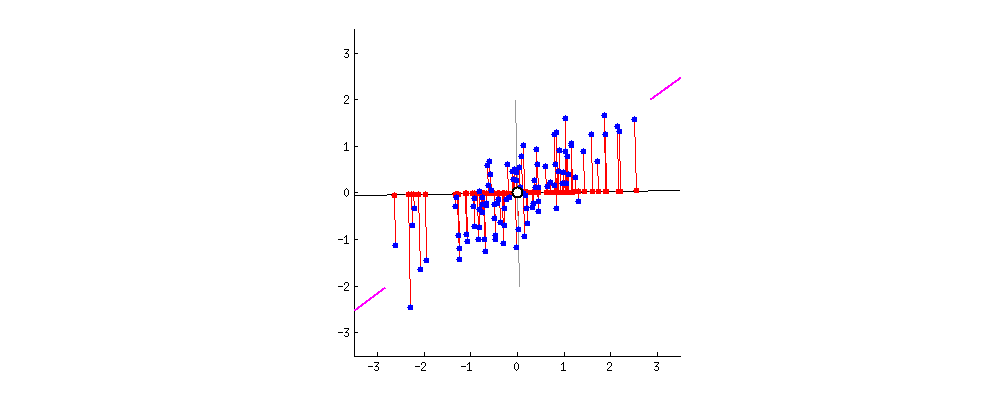

https://habr.com/ru/post/304214/

Метод главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. Изобретён Карлом Пирсоном в 1901 году. Применяется во многих областях, в том числе в эконометрике, биоинформатике, обработке изображений, для сжатия данных, в общественных науках

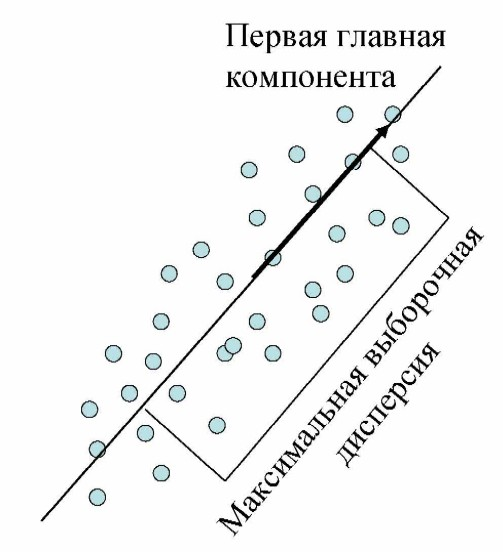

В анализе данных, как и в любом другом анализе, порой бывает нелишним создать упрощенную модель, максимально точно описывающую реальное положение дел. Часто бывает так, что признаки довольно сильно зависят друг от друга и их одновременное наличие избыточно.

К примеру, расход топлива у нас меряется в литрах на 100 км, а в США в милях на галлон. На первый взгляд, величины разные, но на самом деле они строго зависят друг от друга. В миле 1600м, а в галлоне 3.8л. Один признак строго зависит от другого, зная один, знаем и другой.

Но гораздо чаще бывает так, что признаки зависят друг от друга не так строго и (что важно!) не так явно. Объем двигателя в целом положительно влияет на разгон до 100 км/ч, но это верно не всегда. А еще может оказаться, что с учетом не видимых на первый взгляд факторов (типа улучшения качества топлива, использования более легких материалов и прочих современных достижений), год автомобиля не сильно, но тоже влияет на его разгон.

Зная зависимости и их силу, мы можем выразить несколько признаков через один, слить воедино, так сказать, и работать уже с более простой моделью. Конечно, избежать потерь информации, скорее всего не удастся, но минимизировать ее нам поможет как раз метод PCA.

данный метод аппроксимирует n-размерное облако наблюдений до эллипсоида (тоже n-мерного), полуоси которого и будут являться будущими главными компонентами. И при проекции на такие оси (снижении размерности) сохраняется наибольшее количество информации.

Ищется центр облака данных, и туда переносится новое начало координат –  это нулевая главная компонента (PC0) 
Выбирается направление максимального изменения данных – это первая главная компонента (PC1) 
Если данные описаны не полностью (шум велик), то выбирается еще одно направление (PC2) – перпендикулярное к первому, так чтобы описать оставшееся изменение в данных и т.д.

В результате, мы переходим от большого количества переменных к новому представлению, размерность которого значительно меньше. Часто удается упростить данные на порядки: от 1000 переменных перейти всего к двум. При этом ничего не выбрасывается – все переменные учитываются. В то же время несущественная для сути дела часть данных отделяется, превращается в шум. Найденные главные компоненты и дают нам искомые скрытые переменные, управляющие устройством данных.



https://rcs.chemometrics.ru/old/Tutorials/pca.htm

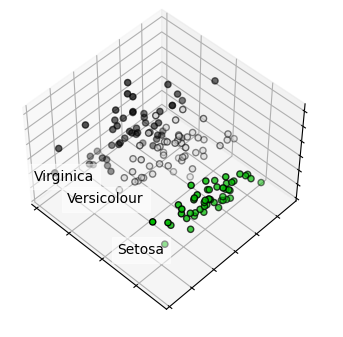

In [8]:

import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

n_components Количество компонентов, которые необходимо сохранить. если n_components не установлен, все компоненты сохраняются:



svd_solver 
Решатель выбирается политикой по умолчанию на основе X.shapeи n_components: если входные данные больше 500x500, а количество извлекаемых компонентов меньше 80% от наименьшего размера данных, то включается более эффективный «рандомизированный» метод. . В противном случае вычисляется точный полный SVD, который впоследствии может быть усечен.

В scikit-learn PCA реализован как объект-трансформер , который обучается компонентfv в своем fit методе и может использоваться для новых данных, чтобы спроецировать их на эти компоненты.

PCA центрирует, но не масштабирует входные данные для каждой функции перед применением SVD. Необязательный параметр whiten=Trueпозволяет проецировать данные на единственное пространство при масштабировании каждого компонента до единичной дисперсии. Это часто полезно, если последующие модели делают сильные предположения об изотропии сигнала: это, например, случай для машин опорных векторов с ядром RBF и алгоритмом кластеризации K-средних.

Ниже приведен пример набора данных по радужной оболочке, который состоит из 4 функций, спроецированных на 2 измерения, которые объясняют большую часть дисперсии:

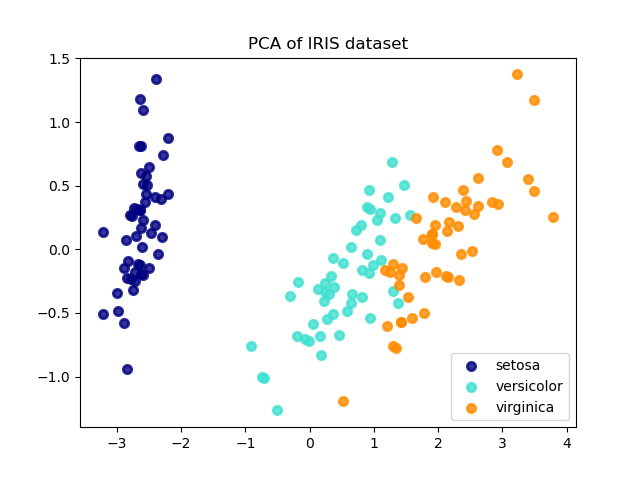

пример использования для реконструкции изображений

https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb

Забавная статья про LDA

https://habr.com/ru/company/surfingbird/blog/150607/

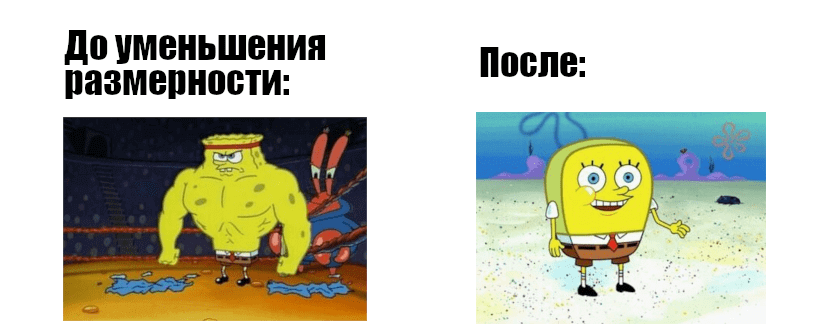

# Нормализация данных

Почему нам нужно нормализовать данные в Python?


Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.



Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.



Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.



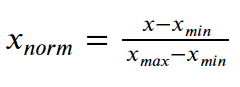

Мы вычитаем минимальное значение из каждой записи, а затем делим результат на диапазон. Где диапазон - это разница между максимальным значением и минимальным значением.



###### два разных способа нормализации данных в Python.

###### Использование normalize() из sklearn


In [144]:
from sklearn import preprocessing


In [145]:
import numpy as np
x_array = np.array([2,3,5,6,7,4,8,7,6])

In [146]:
x_array

array([2, 3, 5, 6, 7, 4, 8, 7, 6])

Теперь мы можем использовать метод normalize() для массива. Этот метод нормализует данные по строке. Давайте посмотрим на метод в действии.



In [147]:
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.11785113 0.1767767  0.29462783 0.35355339 0.41247896 0.23570226
  0.47140452 0.41247896 0.35355339]]


Мы видим, что все значения теперь находятся в диапазоне от 0 до 1. Так работает метод normalize() в sklearn.



Поскольку normalize() нормализует только значения по строкам, нам нужно преобразовать столбец в массив, прежде чем применять метод.

In [14]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [16]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target    species  
0       0.0     setosa  
1       0.0     setosa  
2       0.0     setosa  
3       0.0     setosa  
4       0.0     setosa  
..      ...        ...  
145     2.0  virginica  
146     2.0  virginica  
147     2.0  virginica  
148     2.0  virginica  
149     2.0  virginica  

[150 rows x 6 columns]

In [17]:

x_array = np.array(df['sepal width (cm)'])
normalized_arr = preprocessing.normalize([x_array])

print(normalized_arr)

[[0.09254209 0.07932179 0.08460991 0.08196585 0.09518615 0.10311833
  0.08989803 0.08989803 0.07667773 0.08196585 0.09783021 0.08989803
  0.07932179 0.07932179 0.10576239 0.11633862 0.10311833 0.09254209
  0.10047427 0.10047427 0.08989803 0.09783021 0.09518615 0.08725397
  0.08989803 0.07932179 0.08989803 0.09254209 0.08989803 0.08460991
  0.08196585 0.08989803 0.10840645 0.11105051 0.08196585 0.08460991
  0.09254209 0.09518615 0.07932179 0.08989803 0.09254209 0.06081337
  0.08460991 0.09254209 0.10047427 0.07932179 0.10047427 0.08460991
  0.09783021 0.08725397 0.08460991 0.08460991 0.08196585 0.06081337
  0.07403367 0.07403367 0.08725397 0.06345743 0.07667773 0.07138961
  0.05288119 0.07932179 0.05816931 0.07667773 0.07667773 0.08196585
  0.07932179 0.07138961 0.05816931 0.06610149 0.08460991 0.07403367
  0.06610149 0.07403367 0.07667773 0.07932179 0.07403367 0.07932179
  0.07667773 0.06874555 0.06345743 0.06345743 0.07138961 0.07138961
  0.07932179 0.08989803 0.08196585 0.06081337 0.

Как нормализовать набор данных без преобразования столбцов в массив?


Давайте посмотрим, что произойдет, когда мы попытаемся нормализовать набор данных без преобразования функций в массивы для обработки.



In [18]:
d = preprocessing.normalize(df)



ValueError: could not convert string to float: 'setosa'

In [19]:
d = preprocessing.normalize(df.loc[:, df.columns !='species'])


In [20]:
d

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 , 0.        ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134, 0.        ],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949, 0.        ],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392, 0.        ],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 , 0.        ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704, 0.        ],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 , 0.        ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 , 0.        ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562, 0.        ],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451, 0.        ],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797, 0.        ],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129, 0.        ],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734, 0.        ],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308, 0.        ],
       [0.81120865, 0.55945424, 0.

In [23]:
columns= iris['feature_names'] + ['target']
scaled_df = pd.DataFrame(d, columns=columns)
scaled_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.803773          0.551609           0.220644          0.031521   
1           0.828133          0.507020           0.236609          0.033801   
2           0.805333          0.548312           0.222752          0.034269   
3           0.800030          0.539151           0.260879          0.034784   
4           0.790965          0.569495           0.221470          0.031639   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

Здесь значения нормализованы по строкам, что может быть очень неинтуитивно. Нормализация по строкам означает, что нормализуется каждая отдельная выборка, а не признаки.

Однако вы можете указать ось при вызове метода для нормализации по элементу (столбцу).

Значение параметра оси по умолчанию установлено на 1. Если мы изменим значение на 0, процесс нормализации произойдет по столбцу.

In [71]:
d = preprocessing.normalize(df.loc[:, df.columns !='species'], axis=0)


In [72]:
columns= iris['feature_names'] + ['target']
scaled_df = pd.DataFrame(d, columns=columns)
scaled_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.070563          0.092542           0.027548          0.011502   
1           0.067795          0.079322           0.027548          0.011502   
2           0.065028          0.084610           0.025580          0.011502   
3           0.063645          0.081966           0.029516          0.011502   
4           0.069179          0.095186           0.027548          0.011502   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

###### Вариант 2 Использование MinMaxScaler() для нормализации данных в Python


Когда дело доходит до нормализации данных, Sklearn предоставляет еще один вариант: MinMaxScaler.



Это более популярный выбор для нормализации наборов данных.



Вот код для нормализации набора данных жилья с помощью MinMaxScaler:



In [24]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0     0.0  setosa  
1     0.0  setosa  
2     0.0  setosa  
3     0.0  setosa  
4     0.0  setosa

In [25]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()


In [26]:
names = columns= iris['feature_names'] + ['target']
d = scaler.fit_transform(df.loc[:, df.columns !='species'])

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [28]:
scaled_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           0.458056    0.500000  
std            0.317599    0.409616  
min            0.000000    0.000000  
25%            0.083333    0.000000  
50%            0.500000    0.500000  
75%            0.708333    1.000000  
max            1.000000    1.000000

Значения на выходе находятся между (0 и 1).

MinMaxScaler также дает вам возможность выбрать диапазон функций. По умолчанию диапазон установлен на (0,1). Посмотрим, как изменить диапазон на (0,2).



In [29]:

scaler = preprocessing.MinMaxScaler(feature_range=(0, 2))

In [30]:
names = columns= iris['feature_names'] + ['target']
d = scaler.fit_transform(df.loc[:, df.columns !='species'])

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.444444          1.250000           0.135593          0.083333   
1           0.333333          0.833333           0.135593          0.083333   
2           0.222222          1.000000           0.101695          0.083333   
3           0.166667          0.916667           0.169492          0.083333   
4           0.388889          1.333333           0.135593          0.083333   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

Значения на выходе теперь находятся в диапазоне (0,2).


In [31]:
scaled_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.857407          0.881111           0.934915   
std             0.460037          0.363222           0.598406   
min             0.000000          0.000000           0.000000   
25%             0.444444          0.666667           0.203390   
50%             0.833333          0.833333           1.135593   
75%             1.166667          1.083333           1.389831   
max             2.000000          2.000000           2.000000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           0.916111    1.000000  
std            0.635198    0.819232  
min            0.000000    0.000000  
25%            0.166667    0.000000  
50%            1.000000    1.000000  
75%            1.416667    2.000000  
max            2.000000    2.000000

https://pythonist.ru/normalizacziya-dannyh-v-python/

https://www.machinelearningmastery.ru/normalize-standardize-time-series-data-python/

# LabelEncoder

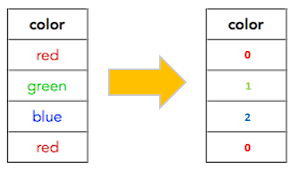

Он кодирует целевые метки со значением от 0 до n_classes-1.

Этот преобразователь следует использовать для кодирования целевых значений,

In [148]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [149]:
le.fit([1, 2, 2, 6])

LabelEncoder()

In [150]:
le.classes_

array([1, 2, 6])

In [151]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2])

In [153]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

Можно кодировать и текстовые метки

In [154]:
le = preprocessing.LabelEncoder()
le.fit(["Инмин", "Экотех", "Горный", "Инмин"])



LabelEncoder()

In [155]:
list(le.classes_)


['Горный', 'Инмин', 'Экотех']

In [156]:
le.transform(["Инмин", "Инмин", "Горный"])


array([1, 1, 0])

In [157]:
list(le.inverse_transform([2, 2, 1]))

['Экотех', 'Экотех', 'Инмин']

Давайте сделаем пример на наших "любимых" ирисах

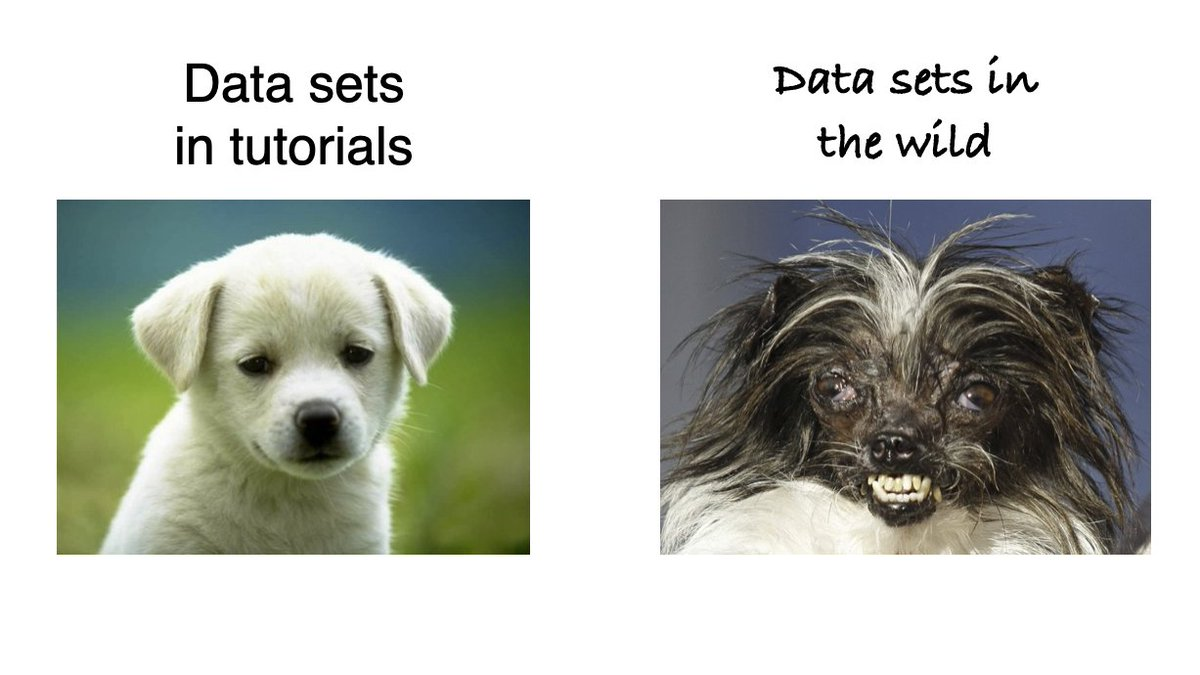

In [158]:
df.head()

Факты.Товар ID  Маржинальная прибыль_sum  Повторение заказа_sum  \
1388    PROD0001406              1.259996e+07                     17   
1411    PROD0001430             -9.055392e+05                      7   
450     PROD0000454              3.876520e+06                     23   
483     PROD0000488              1.746230e-10                     15   
1629    PROD0001657              2.047488e+06                      6   

      Продажи, руб_sum  Продажи, шт_median  Продажи, шт_sum      Доля  \
1388        30799912.0                 4.0             20.0  2.681845   
1411        11319240.0                 6.0              6.0  0.985602   
450         13726692.0                 3.0             31.0  1.195226   
483         10935288.0                 5.0             39.0  0.952170   
1629         9187447.5                 4.0             12.0  0.799980   

         sum_d ABC  Стоимость, руб  Продажи в следующем периоде  Доля_будущая  \
1388  2.681845   A    1.539996e+06                 3.695989e+07      2.691941   
1411  4.862673   A    1.886540e+06                 2.263848e+07      1.648854   
450   3.877071   A    4.427965e+05                 1.505508e+07      1.096523   
483   5.814843   A    2.803920e+05                 1.233725e+07      0.898572   
1629  9.126346   A    7.656206e+05                 1.224993e+07      0.892213   

      sum_d_next ABC_next  Изменение класса class class_next  
1388    2.691941        A               0.0     0          0  
1411    4.340795        A               0.0     0          0  
450     5.437318        A               0.0     0          0  
483     6.335891        A               0.0     0          0  
1629    7.228103        A               0.0     0          0

In [54]:
df.species=le.fit_transform(df.species)

In [55]:
df.species.unique()

array([0, 1, 2])

In [56]:
df.species=le.inverse_transform(df.species)

In [57]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

шутки ради

###### еще есть OneHotEncoder

Этот кодировщик берёт столбец с категориальными данными, который был предварительно закодирован в признак, и создаёт для него несколько новых столбцов. Числа заменяются на единицы и нули, в зависимости от того, какому столбцу какое значение присуще. 



https://habr.com/ru/post/456294/

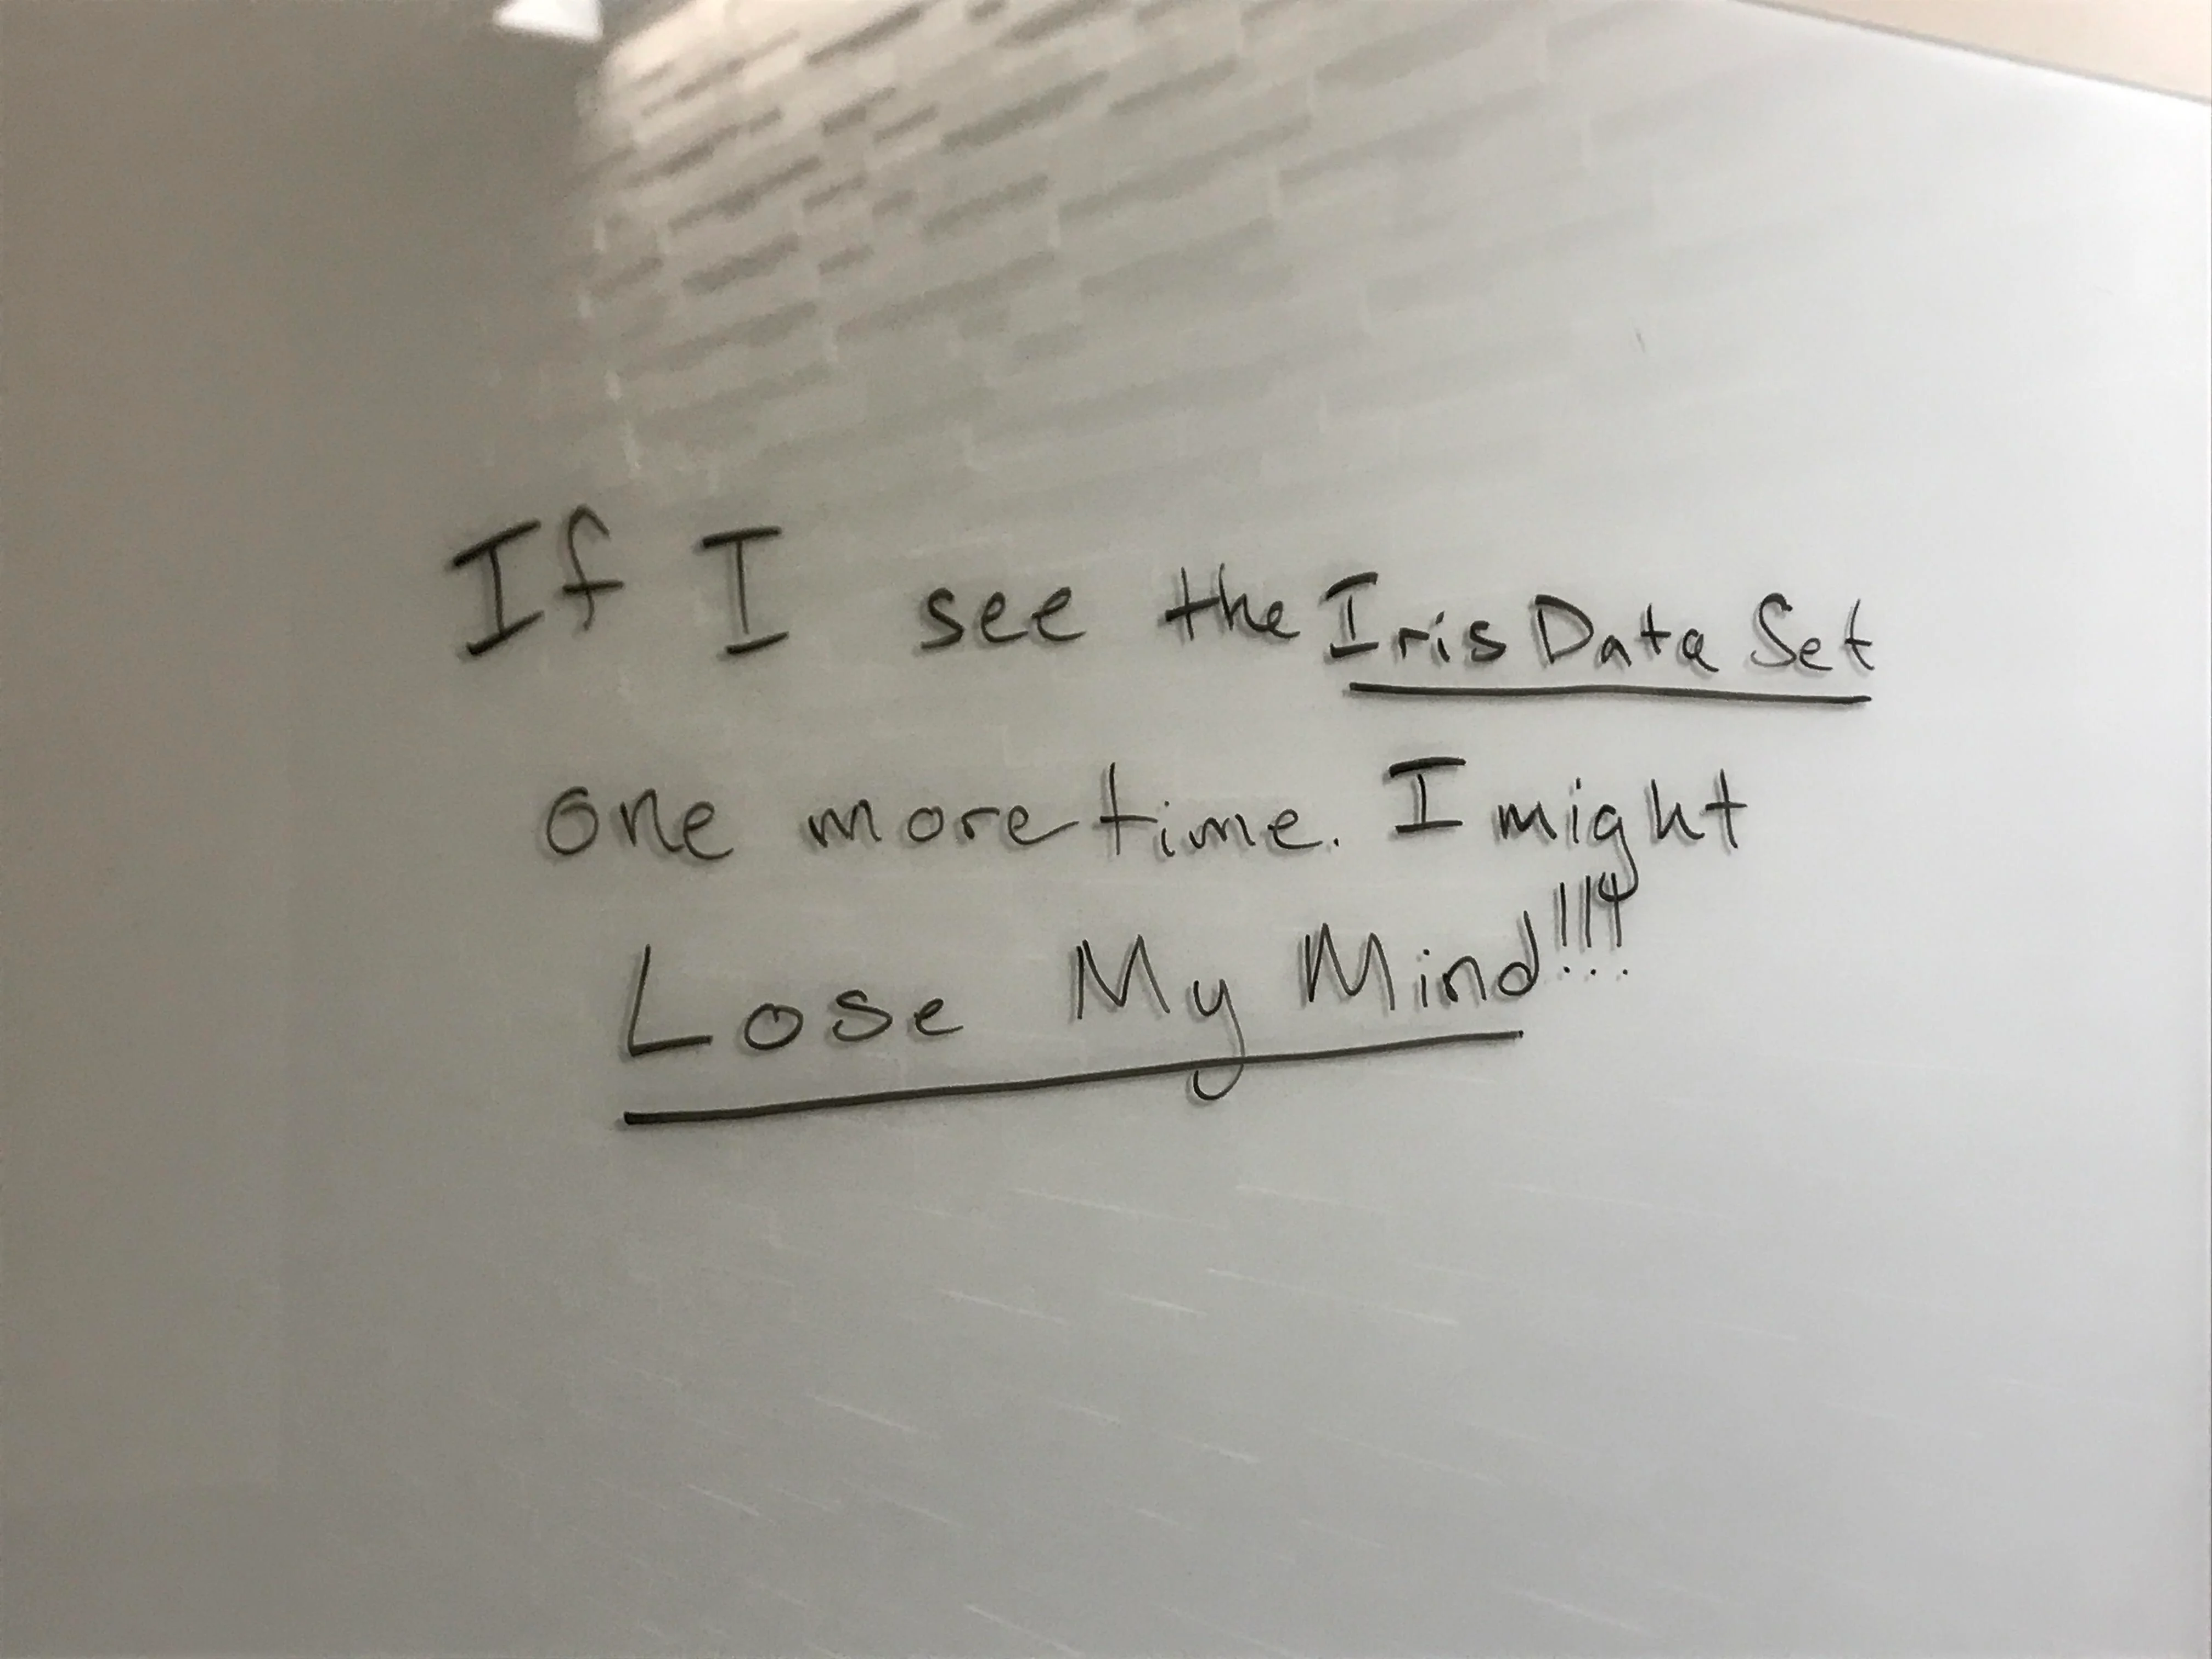

In [160]:
from sklearn.preprocessing import OneHotEncoder

In [159]:
iris= datasets.load_iris()
X = iris.data
Y = iris.target

In [161]:
onehot_encoder=OneHotEncoder(sparse=False)


In [162]:
reshaped=Y.reshape(len(Y), 1)


In [163]:
reshaped

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [164]:
y_onehot=onehot_encoder.fit_transform(reshaped)

In [166]:
print(y_onehot[50:60])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [71]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [74]:
reshaped

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

###### P.S. функция reshape()

используется для изменения формы любого существующего массива без изменения данных, которые в нем находятся.

Форма определяется общим количеством элементов в каждом измерении. С помощью функции reshape() можно добавлять или удалять измерения в массиве, а также изменять количество элементов в каждом измерении. Например, можно преобразовать одномерный массив в многомерный (но не наоборот!).

https://pythonist.ru/kak-ispolzovat-funkcziyu-reshape-biblioteki-numpy-v-python/

# Практический кейс на Pandas. Часть 1

In [76]:
ls

 athletes_sochi.txt*   L8.ipynb*
 data.csv*             Lesson_1.ipynb*
 DataSet_w_NA.xlsx*    Lesson_2_Special_Cl_ML.ipynb*
 foo.xlsx*             Lesson_3_Pandas_Label_encoding_ML.ipynb*
 iris.csv*             Lesson_4_Отладка_Collections_iter.ipynb*
 L1.ipynb*             some_file2.txt*
 L2.ipynb*             some_file.txt*
'L3 .ipynb'*           text3.txt*
 L4.ipynb*             text.txt*
 L5.ipynb*             tips.csv*
 L6.ipynb*             Мисис_2022_успеваемость.xlsx*
 L7.ipynb*


In [199]:
df = pd.read_excel('DataSet_w_NA.xlsx', sheet_name="Испорченные факты")

In [83]:
df.head()

Номер заказа Возврат          Дата заказа        Дата отправки  \
0  2014-100279     Нет  2015-09-10 00:00:00  2015-09-14 00:00:00   
1  2014-100293     Нет  2015-09-14 00:00:00  2015-09-18 00:00:00   
2  2014-100328     Нет  2015-07-28 00:00:00  2015-08-03 00:00:00   
3  2014-100363     Нет  2015-10-08 00:00:00  2015-10-15 00:00:00   
4  2014-100363     Нет  2015-10-08 00:00:00  2015-10-15 00:00:00   

  Режим отправки Факты.Контрагент ID Факты.Товар ID  Продажи, руб  \
0       Стандарт         CLNT0000422    PROD0000870       11190.0   
1       Стандарт         CLNT0000784    PROD0000646       45528.0   
2       Стандарт         CLNT0000342    PROD0000187        1964.0   
3       Стандарт         CLNT0000146    PROD0001095        1184.0   
4       Стандарт         CLNT0000146    PROD0001616        9504.0   

   Продажи, шт  Скидка  Маржинальная прибыль  Повторение заказа  \
0          2.0     0.0               5371.20                  1   
1          6.0     0.2              15934.80                  1   
2          1.0     0.2                662.85                  1   
3          2.0     0.2                414.40                  2   
4          3.0     0.2               3445.20                  2   

   Повторение контрагента  Повторение товара  
0                       7                  3  
1                       4                  8  
2                       4                 12  
3                      12                  7  
4                      12                  3

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10293 entries, 0 to 10292
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Номер заказа            10293 non-null  object 
 1   Возврат                 10293 non-null  object 
 2   Дата заказа             10293 non-null  object 
 3   Дата отправки           10293 non-null  object 
 4   Режим отправки          10293 non-null  object 
 5   Факты.Контрагент ID     10203 non-null  object 
 6   Факты.Товар ID          10242 non-null  object 
 7   Продажи, руб            10098 non-null  float64
 8   Продажи, шт             10272 non-null  float64
 9   Скидка                  10293 non-null  float64
 10  Маржинальная прибыль    10275 non-null  float64
 11  Повторение заказа       10293 non-null  int64  
 12  Повторение контрагента  10293 non-null  int64  
 13  Повторение товара       10293 non-null  int64  
dtypes: float64(4), int64(3), object(7)
mem

In [176]:
df.isnull().values.any()

False

In [177]:
df.isnull().any()

Номер заказа              False
Возврат                   False
Дата заказа               False
Дата отправки             False
Режим отправки            False
Факты.Контрагент ID       False
Факты.Товар ID            False
Продажи, руб              False
Продажи, шт               False
Скидка                    False
Маржинальная прибыль      False
Повторение заказа         False
Повторение контрагента    False
Повторение товара         False
dtype: bool

In [172]:
df.isna().sum()

Номер заказа                0
Возврат                     0
Дата заказа                 0
Дата отправки               0
Режим отправки              0
Факты.Контрагент ID        90
Факты.Товар ID             51
Продажи, руб              195
Продажи, шт                21
Скидка                      0
Маржинальная прибыль       18
Повторение заказа           0
Повторение контрагента      0
Повторение товара           0
dtype: int64

In [178]:
df.isna().sum().sum()

0

In [200]:
df = df.dropna()

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 10292
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Номер заказа            9993 non-null   object 
 1   Возврат                 9993 non-null   object 
 2   Дата заказа             9993 non-null   object 
 3   Дата отправки           9993 non-null   object 
 4   Режим отправки          9993 non-null   object 
 5   Факты.Контрагент ID     9993 non-null   object 
 6   Факты.Товар ID          9993 non-null   object 
 7   Продажи, руб            9993 non-null   float64
 8   Продажи, шт             9993 non-null   float64
 9   Скидка                  9993 non-null   float64
 10  Маржинальная прибыль    9993 non-null   float64
 11  Повторение заказа       9993 non-null   int64  
 12  Повторение контрагента  9993 non-null   int64  
 13  Повторение товара       9993 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memo

In [179]:
piv_df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [180]:
piv_df

A    B      C  D  E
0  foo  one  small  1  2
1  foo  one  large  2  4
2  foo  one  large  2  5
3  foo  two  small  3  5
4  foo  two  small  3  6
5  bar  one  large  4  6
6  bar  one  small  5  8
7  bar  two  small  6  9
8  bar  two  large  7  9

In [181]:
table = pd.pivot_table(piv_df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)

In [182]:
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [183]:
table = pd.pivot_table(piv_df, values='D', index=['B', 'A'], columns=['C'], aggfunc=np.sum)

In [98]:
table

C        large  small
B   A                
one bar    4.0    5.0
    foo    4.0    1.0
two bar    7.0    6.0
    foo    NaN    6.0

In [184]:
table = pd.pivot_table(piv_df, values=['D', 'E'], index=['A', 'C'],aggfunc={'D': np.mean, 'E': np.mean})

In [185]:
table

D         E
A   C                        
bar large  5.500000  7.500000
    small  5.500000  8.500000
foo large  2.000000  4.500000
    small  2.333333  4.333333

In [186]:
table = pd.pivot_table(piv_df, values=['D', 'E'], index=['A', 'C'],aggfunc={'D': np.mean,'E': [min, max, np.mean]})

In [187]:
table

D   E              
               mean max      mean min
A   C                                
bar large  5.500000   9  7.500000   6
    small  5.500000   9  8.500000   8
foo large  2.000000   5  4.500000   4
    small  2.333333   6  4.333333   2

ABC-анализ — метод, позволяющий классифицировать ресурсы фирмы по степени их важности. Этот анализ является одним из методов рационализации и может применяться в сфере деятельности любого предприятия. В его основе лежит принцип Парето — 20 % всех товаров дают 80 % оборота. По отношению к ABC-анализу правило Парето может прозвучать так: надёжный контроль 20 % позиций позволяет на 80 % контролировать систему, будь то запасы сырья и комплектующих, либо продуктовый ряд предприятия и т. п. Часто ABC-анализ путают с ABC-методом, расшифровывая ABC как Activity Based Costing, что в корне неверно.

ABC-анализ — анализ товарных запасов путём деления на три категории:

А — наиболее ценные, 20 % — ассортимента (номенклатура); 80 % — продаж
В — промежуточные, 30 % — ассортимента; 15 % — продаж
С — наименее ценные, 50 % — ассортимента; 5 % — продаж
В зависимости от целей анализа может быть выделено произвольное количество групп. Чаще всего выделяют 3, реже 4-5 групп.

По сути, ABC-анализ — это ранжирование ассортимента по разным параметрам. Ранжировать таким образом можно и поставщиков, и складские запасы, и покупателей, и длительные периоды продаж — всё, что имеет достаточное количество статистических данных. Результатом АВС анализа является группировка объектов по степени влияния на общий результат.

АВС-анализ основывается на принципе дисбаланса, при проведении которого строится график зависимости совокупного эффекта от количества элементов. Такой график называется кривой Парето, кривой Лоренца или ABC-кривой. По результатам анализа ассортиментные позиции ранжируются и группируются в зависимости от размера их вклада в совокупный эффект. В логистике ABC-анализ обычно применяют с целью отслеживания объёмов отгрузки определённых артикулов и частоты обращений к той или иной позиции ассортимента, а также для ранжирования клиентов по количеству или объёму сделанных ими заказов.

Определяем цель анализа (а зачем, собственно, нужен вам этот анализ?).

Определяем действия по итогам анализа (что будем делать с полученными результатами?).

Выбираем объект анализа (что будем анализировать?) и параметр анализа (по какому признаку будем анализировать?). Обычно объектами АВС анализа являются поставщики, товарные группы, товарные категории, товарные позиции. Каждый из этих объектов имеет разные параметры описания и измерения: объём продаж (в денежном или количественном измерении), доход (в денежном измерении), товарный запас, оборачиваемость и т. д.

Составляем рейтинговый список объектов по убыванию значения параметра.

Рассчитываем долю параметра от общей суммы параметров с накопительным итогом. Доля с накопительным итогом высчитывается путём прибавления параметра к сумме предыдущих параметров.

Выделяем группы А, В и С: присваиваем значения групп выбранным объектам.

In [201]:
df =pd.pivot_table(df, values=['Продажи, руб', 'Продажи, шт','Повторение заказа','Маржинальная прибыль','Повторение товара'], index=["Факты.Товар ID"],
                     aggfunc={'Продажи, шт': [np.median, np.sum],
                              'Продажи, руб': np.sum,
                              'Повторение заказа': np.sum,
                              'Маржинальная прибыль': np.sum
                        
                               })

In [202]:
df.head()

Маржинальная прибыль Повторение заказа Продажи, руб  \
                                sum               sum          sum   
Факты.Товар ID                                                       
PROD0000001               -28160.70                 6     631978.5   
PROD0000002               963721.00                32    5318764.0   
PROD0000003                32200.55                18      76755.0   
PROD0000004              -266380.65                17    3621384.0   
PROD0000005                31874.40                18     150984.0   

               Продажи, шт        
                    median   sum  
Факты.Товар ID                    
PROD0000001            2.5  12.0  
PROD0000002            3.5  51.0  
PROD0000003            2.0  23.0  
PROD0000004            4.0  29.0  
PROD0000005            5.0  24.0

In [203]:
newname=df.columns.map('_'.join)

In [204]:
newname

Index(['Маржинальная прибыль_sum', 'Повторение заказа_sum', 'Продажи, руб_sum',
       'Продажи, шт_median', 'Продажи, шт_sum'],
      dtype='object')

In [205]:
df.columns=newname

In [193]:
df.head()

Маржинальная прибыль_sum  Повторение заказа_sum  \
Факты.Товар ID                                                    
PROD0000001                    -28160.70                      6   
PROD0000002                    963721.00                     32   
PROD0000003                     32200.55                     18   
PROD0000004                   -266380.65                     17   
PROD0000005                     31874.40                     18   

                Продажи, руб_sum  Продажи, шт_median  Продажи, шт_sum  
Факты.Товар ID                                                         
PROD0000001             631978.5                 2.5             12.0  
PROD0000002            5318764.0                 3.5             51.0  
PROD0000003              76755.0                 2.0             23.0  
PROD0000004            3621384.0                 4.0             29.0  
PROD0000005             150984.0                 5.0             24.0

In [206]:
df=df.reset_index()

In [207]:
df.head()

Факты.Товар ID  Маржинальная прибыль_sum  Повторение заказа_sum  \
0    PROD0000001                 -28160.70                      6   
1    PROD0000002                 963721.00                     32   
2    PROD0000003                  32200.55                     18   
3    PROD0000004                -266380.65                     17   
4    PROD0000005                  31874.40                     18   

   Продажи, руб_sum  Продажи, шт_median  Продажи, шт_sum  
0          631978.5                 2.5             12.0  
1         5318764.0                 3.5             51.0  
2           76755.0                 2.0             23.0  
3         3621384.0                 4.0             29.0  
4          150984.0                 5.0             24.0

In [208]:
df['Продажи, шт_sum']

0       12.0
1       51.0
2       23.0
3       29.0
4       24.0
        ... 
1857     3.0
1858     3.0
1859     4.0
1860     5.0
1861     3.0
Name: Продажи, шт_sum, Length: 1862, dtype: float64

In [209]:
total_sale=df['Продажи, руб_sum'].sum()

In [210]:
df['Доля']=df['Продажи, руб_sum']/total_sale * 100

In [211]:
df['Доля'].sum()

100.0

In [213]:
df = df.sort_values(by=('Продажи, руб_sum'), ascending=False)

In [214]:
df

Факты.Товар ID  Маржинальная прибыль_sum  Повторение заказа_sum  \
1388    PROD0001406              1.259996e+07                     17   
450     PROD0000454              3.876520e+06                     23   
1411    PROD0001430             -9.055392e+05                      7   
483     PROD0000488              1.746230e-10                     15   
1176    PROD0001187              1.116753e+06                     33   
...             ...                       ...                    ...   
1838    PROD0001871              1.578500e+03                      1   
1854    PROD0001887              1.193400e+03                      1   
1747    PROD0001779              1.555200e+03                      3   
1675    PROD0001703              1.411200e+03                      1   
237     PROD0000239             -2.233000e+03                      1   

      Продажи, руб_sum  Продажи, шт_median  Продажи, шт_sum      Доля  
1388        30799912.0                 4.0             20.0  2.681845  
450         13726692.0                 3.0             31.0  1.195226  
1411        11319240.0                 6.0              6.0  0.985602  
483         10935288.0                 5.0             39.0  0.952170  
1176         9911739.5                 3.0             37.0  0.863046  
...                ...                 ...              ...       ...  
1838            3850.0                 2.0              2.0  0.000335  
1854            3536.0                 2.0              2.0  0.000308  
1747            3240.0                 1.0              1.0  0.000282  
1675            2880.0                 2.0              2.0  0.000251  
237              812.0                 2.0              2.0  0.000071  

[1862 rows x 7 columns]

In [215]:
df=df.assign(sum_d=df['Доля'].cumsum())

In [216]:
df

Факты.Товар ID  Маржинальная прибыль_sum  Повторение заказа_sum  \
1388    PROD0001406              1.259996e+07                     17   
450     PROD0000454              3.876520e+06                     23   
1411    PROD0001430             -9.055392e+05                      7   
483     PROD0000488              1.746230e-10                     15   
1176    PROD0001187              1.116753e+06                     33   
...             ...                       ...                    ...   
1838    PROD0001871              1.578500e+03                      1   
1854    PROD0001887              1.193400e+03                      1   
1747    PROD0001779              1.555200e+03                      3   
1675    PROD0001703              1.411200e+03                      1   
237     PROD0000239             -2.233000e+03                      1   

      Продажи, руб_sum  Продажи, шт_median  Продажи, шт_sum      Доля  \
1388        30799912.0                 4.0             20.0  2.681845   
450         13726692.0                 3.0             31.0  1.195226   
1411        11319240.0                 6.0              6.0  0.985602   
483         10935288.0                 5.0             39.0  0.952170   
1176         9911739.5                 3.0             37.0  0.863046   
...                ...                 ...              ...       ...   
1838            3850.0                 2.0              2.0  0.000335   
1854            3536.0                 2.0              2.0  0.000308   
1747            3240.0                 1.0              1.0  0.000282   
1675            2880.0                 2.0              2.0  0.000251   
237              812.0                 2.0              2.0  0.000071   

           sum_d  
1388    2.681845  
450     3.877071  
1411    4.862673  
483     5.814843  
1176    6.677889  
...          ...  
1838   99.999089  
1854   99.999396  
1747   99.999679  
1675   99.999929  
237   100.000000  

[1862 rows x 8 columns]

In [217]:
df.loc[(df['sum_d'] <= 80), 'ABC'] = 'A'
df.loc[(df['sum_d'] > 80) & (df['sum_d'] <= 95), 'ABC'] = 'B'
df.loc[(df['sum_d'] > 95), 'ABC'] = 'C'


In [218]:
df

Факты.Товар ID  Маржинальная прибыль_sum  Повторение заказа_sum  \
1388    PROD0001406              1.259996e+07                     17   
450     PROD0000454              3.876520e+06                     23   
1411    PROD0001430             -9.055392e+05                      7   
483     PROD0000488              1.746230e-10                     15   
1176    PROD0001187              1.116753e+06                     33   
...             ...                       ...                    ...   
1838    PROD0001871              1.578500e+03                      1   
1854    PROD0001887              1.193400e+03                      1   
1747    PROD0001779              1.555200e+03                      3   
1675    PROD0001703              1.411200e+03                      1   
237     PROD0000239             -2.233000e+03                      1   

      Продажи, руб_sum  Продажи, шт_median  Продажи, шт_sum      Доля  \
1388        30799912.0                 4.0             20.0  2.681845   
450         13726692.0                 3.0             31.0  1.195226   
1411        11319240.0                 6.0              6.0  0.985602   
483         10935288.0                 5.0             39.0  0.952170   
1176         9911739.5                 3.0             37.0  0.863046   
...                ...                 ...              ...       ...   
1838            3850.0                 2.0              2.0  0.000335   
1854            3536.0                 2.0              2.0  0.000308   
1747            3240.0                 1.0              1.0  0.000282   
1675            2880.0                 2.0              2.0  0.000251   
237              812.0                 2.0              2.0  0.000071   

           sum_d ABC  
1388    2.681845   A  
450     3.877071   A  
1411    4.862673   A  
483     5.814843   A  
1176    6.677889   A  
...          ...  ..  
1838   99.999089   C  
1854   99.999396   C  
1747   99.999679   C  
1675   99.999929   C  
237   100.000000   C  

[1862 rows x 9 columns]

###### -------------------------------------------------------------------------

In [127]:
piv_df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [128]:
piv_df

A    B      C  D  E
0  foo  one  small  1  2
1  foo  one  large  2  4
2  foo  one  large  2  5
3  foo  two  small  3  5
4  foo  two  small  3  6
5  bar  one  large  4  6
6  bar  one  small  5  8
7  bar  two  small  6  9
8  bar  two  large  7  9

In [129]:
import numpy as np
cut_points = [np.percentile(piv_df.D, i) for i in [50, 80, 95]]
piv_df.group = 1
for i in range(3):
    piv_df.group = piv_df.group + (piv_df.D < cut_points[i])
    print(piv_df.group)
# or <= cut_points[i]

0    2
1    2
2    2
3    1
4    1
5    1
6    1
7    1
8    1
Name: D, dtype: int64
0    3
1    3
2    3
3    2
4    2
5    2
6    2
7    1
8    1
Name: D, dtype: int64
0    4
1    4
2    4
3    3
4    3
5    3
6    3
7    2
8    1
Name: D, dtype: int64


###### --------------------------------------------------

In [219]:
df['Стоимость, руб'] = df['Продажи, руб_sum']/df['Продажи, шт_sum']

In [220]:
df['Продажи в следующем периоде']= (df['Продажи, шт_sum'] + df['Продажи, шт_median']) *df['Стоимость, руб']

In [221]:
total_sale_next=df['Продажи в следующем периоде'].sum()

In [222]:
total_sale_next

1372983059.734433

In [223]:
df['Доля_будущая']=df['Продажи в следующем периоде']/total_sale_next * 100

In [224]:
df = df.sort_values(by=('Продажи в следующем периоде'), ascending=False)

In [225]:
df=df.assign(sum_d_next=df['Доля_будущая'].cumsum())

In [226]:
df['Доля_будущая'].sum()

100.0

In [227]:
df.loc[(df['sum_d_next'] <= 80), 'ABC_next'] = 'A'
df.loc[(df['sum_d_next'] > 80) & (df['sum_d_next'] <= 95), 'ABC_next'] = 'B'
df.loc[(df['sum_d_next'] > 95), 'ABC_next'] = 'C'


In [228]:
df.loc[(df['ABC'] != df['ABC_next']), 'Изменение класса'] = 1
df.loc[(df['ABC'] == df['ABC_next']), 'Изменение класса'] = 0


In [229]:
df['Изменение класса'].sum()

61.0

In [230]:
df.loc[(df['sum_d'] <= 80), 'class'] = '0'
df.loc[(df['sum_d'] > 80) & (df['sum_d'] <= 95), 'class'] = '1'
df.loc[(df['sum_d'] > 95), 'class'] = '2'


In [231]:
df.loc[(df['sum_d_next'] <= 80), 'class_next'] = '0'
df.loc[(df['sum_d_next'] > 80) & (df['sum_d_next'] <= 95), 'class_next'] = '1'
df.loc[(df['sum_d_next'] > 95), 'class_next'] = '2'


In [232]:
df

Факты.Товар ID  Маржинальная прибыль_sum  Повторение заказа_sum  \
1388    PROD0001406              1.259996e+07                     17   
1411    PROD0001430             -9.055392e+05                      7   
450     PROD0000454              3.876520e+06                     23   
483     PROD0000488              1.746230e-10                     15   
1629    PROD0001657              2.047488e+06                      6   
...             ...                       ...                    ...   
1245    PROD0001257              1.050000e+03                     12   
1108    PROD0001119              2.220000e+02                     13   
801     PROD0000808              1.702000e+03                      2   
1675    PROD0001703              1.411200e+03                      1   
237     PROD0000239             -2.233000e+03                      1   

      Продажи, руб_sum  Продажи, шт_median  Продажи, шт_sum      Доля  \
1388        30799912.0                 4.0             20.0  2.681845   
1411        11319240.0                 6.0              6.0  0.985602   
450         13726692.0                 3.0             31.0  1.195226   
483         10935288.0                 5.0             39.0  0.952170   
1629         9187447.5                 4.0             12.0  0.799980   
...                ...                 ...              ...       ...   
1245            4200.0                 2.5              5.0  0.000366   
1108            4884.0                 1.5              6.0  0.000425   
801             4048.0                 2.5              5.0  0.000352   
1675            2880.0                 2.0              2.0  0.000251   
237              812.0                 2.0              2.0  0.000071   

           sum_d ABC  Стоимость, руб  Продажи в следующем периоде  \
1388    2.681845   A    1.539996e+06                 3.695989e+07   
1411    4.862673   A    1.886540e+06                 2.263848e+07   
450     3.877071   A    4.427965e+05                 1.505508e+07   
483     5.814843   A    2.803920e+05                 1.233725e+07   
1629    9.126346   A    7.656206e+05                 1.224993e+07   
...          ...  ..             ...                          ...   
1245   99.997704   C    8.400000e+02                 6.300000e+03   
1108   99.996103   C    8.140000e+02                 6.105000e+03   
801    99.998056   C    8.096000e+02                 6.072000e+03   
1675   99.999929   C    1.440000e+03                 5.760000e+03   
237   100.000000   C    4.060000e+02                 1.624000e+03   

      Доля_будущая  sum_d_next ABC_next  Изменение класса class class_next  
1388      2.691941    2.691941        A               0.0     0          0  
1411      1.648854    4.340795        A               0.0     0          0  
450       1.096523    5.437318        A               0.0     0          0  
483       0.898572    6.335891        A               0.0     0          0  
1629      0.892213    7.228103        A               0.0     0          0  
...            ...         ...      ...               ...   ...        ...  
1245      0.000459   99.998575        C               0.0     2          2  
1108      0.000445   99.999020        C               0.0     2          2  
801       0.000442   99.999462        C               0.0     2          2  
1675      0.000420   99.999882        C               0.0     2          2  
237       0.000118  100.000000        C               0.0     2          2  

[1862 rows x 17 columns]

# ДЗ

Используя  RandomForestClassifier и еще 2 метода МО предсказать будущий  ABC класс на основе любых фичей


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [71]:
path = './data/DataSet_w_NA (1).xlsx'
df = pd.read_excel(path, sheet_name="Испорченные факты")

In [72]:
df.isnull().values.any()
df.isnull().any()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 10292
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Номер заказа            9993 non-null   object 
 1   Возврат                 9993 non-null   object 
 2   Дата заказа             9993 non-null   object 
 3   Дата отправки           9993 non-null   object 
 4   Режим отправки          9993 non-null   object 
 5   Факты.Контрагент ID     9993 non-null   object 
 6   Факты.Товар ID          9993 non-null   object 
 7   Продажи, руб            9993 non-null   float64
 8   Продажи, шт             9993 non-null   float64
 9   Скидка                  9993 non-null   float64
 10  Маржинальная прибыль    9993 non-null   float64
 11  Повторение заказа       9993 non-null   int64  
 12  Повторение контрагента  9993 non-null   int64  
 13  Повторение товара       9993 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memo

In [73]:
df =pd.pivot_table(df, values=['Продажи, руб', 'Продажи, шт','Повторение заказа','Маржинальная прибыль','Повторение товара'], index=["Факты.Товар ID"],
                     aggfunc={'Продажи, шт': [np.median, np.sum],
                              'Продажи, руб': np.sum,
                              'Повторение заказа': np.sum,
                              'Маржинальная прибыль': np.sum
                        
                               })

In [74]:
newname=df.columns.map('_'.join)
df.columns=newname
df=df.reset_index()

In [75]:
total_sale=df['Продажи, руб_sum'].sum()
df['Доля']=df['Продажи, руб_sum']/total_sale * 100
df = df.sort_values(by=('Продажи, руб_sum'), ascending=False)
df


Факты.Товар ID  Маржинальная прибыль_sum  Повторение заказа_sum  \
1388    PROD0001406              1.259996e+07                     17   
450     PROD0000454              3.876520e+06                     23   
1411    PROD0001430             -9.055392e+05                      7   
483     PROD0000488              1.746230e-10                     15   
1176    PROD0001187              1.116753e+06                     33   
...             ...                       ...                    ...   
1838    PROD0001871              1.578500e+03                      1   
1854    PROD0001887              1.193400e+03                      1   
1747    PROD0001779              1.555200e+03                      3   
1675    PROD0001703              1.411200e+03                      1   
237     PROD0000239             -2.233000e+03                      1   

      Продажи, руб_sum  Продажи, шт_median  Продажи, шт_sum      Доля  
1388        30799912.0                 4.0             20.0  2.681845  
450         13726692.0                 3.0             31.0  1.195226  
1411        11319240.0                 6.0              6.0  0.985602  
483         10935288.0                 5.0             39.0  0.952170  
1176         9911739.5                 3.0             37.0  0.863046  
...                ...                 ...              ...       ...  
1838            3850.0                 2.0              2.0  0.000335  
1854            3536.0                 2.0              2.0  0.000308  
1747            3240.0                 1.0              1.0  0.000282  
1675            2880.0                 2.0              2.0  0.000251  
237              812.0                 2.0              2.0  0.000071  

[1862 rows x 7 columns]

In [76]:
df=df.assign(sum_d=df['Доля'].cumsum())
df.loc[(df['sum_d'] <= 80), 'ABC'] = 'A'
df.loc[(df['sum_d'] > 80) & (df['sum_d'] <= 95), 'ABC'] = 'B'
df.loc[(df['sum_d'] > 95), 'ABC'] = 'C'
df

Факты.Товар ID  Маржинальная прибыль_sum  Повторение заказа_sum  \
1388    PROD0001406              1.259996e+07                     17   
450     PROD0000454              3.876520e+06                     23   
1411    PROD0001430             -9.055392e+05                      7   
483     PROD0000488              1.746230e-10                     15   
1176    PROD0001187              1.116753e+06                     33   
...             ...                       ...                    ...   
1838    PROD0001871              1.578500e+03                      1   
1854    PROD0001887              1.193400e+03                      1   
1747    PROD0001779              1.555200e+03                      3   
1675    PROD0001703              1.411200e+03                      1   
237     PROD0000239             -2.233000e+03                      1   

      Продажи, руб_sum  Продажи, шт_median  Продажи, шт_sum      Доля  \
1388        30799912.0                 4.0             20.0  2.681845   
450         13726692.0                 3.0             31.0  1.195226   
1411        11319240.0                 6.0              6.0  0.985602   
483         10935288.0                 5.0             39.0  0.952170   
1176         9911739.5                 3.0             37.0  0.863046   
...                ...                 ...              ...       ...   
1838            3850.0                 2.0              2.0  0.000335   
1854            3536.0                 2.0              2.0  0.000308   
1747            3240.0                 1.0              1.0  0.000282   
1675            2880.0                 2.0              2.0  0.000251   
237              812.0                 2.0              2.0  0.000071   

           sum_d ABC  
1388    2.681845   A  
450     3.877071   A  
1411    4.862673   A  
483     5.814843   A  
1176    6.677889   A  
...          ...  ..  
1838   99.999089   C  
1854   99.999396   C  
1747   99.999679   C  
1675   99.999929   C  
237   100.000000   C  

[1862 rows x 9 columns]

Найти причину/фактор низкой маржинальности

In [77]:
df['Стоимость, руб'] = df['Продажи, руб_sum']/df['Продажи, шт_sum']
df['Продажи в следующем периоде']= (df['Продажи, шт_sum'] + df['Продажи, шт_median']) *df['Стоимость, руб']
total_sale_next=df['Продажи в следующем периоде'].sum()
df['Доля_будущая']=df['Продажи в следующем периоде']/total_sale_next * 100
df = df.sort_values(by=('Продажи в следующем периоде'), ascending=False)
df=df.assign(sum_d_next=df['Доля_будущая'].cumsum())
df.loc[(df['sum_d_next'] <= 80), 'ABC_next'] = 'A'
df.loc[(df['sum_d_next'] > 80) & (df['sum_d_next'] <= 95), 'ABC_next'] = 'B'
df.loc[(df['sum_d_next'] > 95), 'ABC_next'] = 'C'
df.loc[(df['ABC'] != df['ABC_next']), 'Изменение класса'] = 1
df.loc[(df['ABC'] == df['ABC_next']), 'Изменение класса'] = 0
df.loc[(df['sum_d'] <= 80), 'class'] = '0'
df.loc[(df['sum_d'] > 80) & (df['sum_d'] <= 95), 'class'] = '1'
df.loc[(df['sum_d'] > 95), 'class'] = '2'
df.loc[(df['sum_d_next'] <= 80), 'class_next'] = '0'
df.loc[(df['sum_d_next'] > 80) & (df['sum_d_next'] <= 95), 'class_next'] = '1'
df.loc[(df['sum_d_next'] > 95), 'class_next'] = '2'
df

Факты.Товар ID  Маржинальная прибыль_sum  Повторение заказа_sum  \
1388    PROD0001406              1.259996e+07                     17   
1411    PROD0001430             -9.055392e+05                      7   
450     PROD0000454              3.876520e+06                     23   
483     PROD0000488              1.746230e-10                     15   
1629    PROD0001657              2.047488e+06                      6   
...             ...                       ...                    ...   
1245    PROD0001257              1.050000e+03                     12   
1108    PROD0001119              2.220000e+02                     13   
801     PROD0000808              1.702000e+03                      2   
1675    PROD0001703              1.411200e+03                      1   
237     PROD0000239             -2.233000e+03                      1   

      Продажи, руб_sum  Продажи, шт_median  Продажи, шт_sum      Доля  \
1388        30799912.0                 4.0             20.0  2.681845   
1411        11319240.0                 6.0              6.0  0.985602   
450         13726692.0                 3.0             31.0  1.195226   
483         10935288.0                 5.0             39.0  0.952170   
1629         9187447.5                 4.0             12.0  0.799980   
...                ...                 ...              ...       ...   
1245            4200.0                 2.5              5.0  0.000366   
1108            4884.0                 1.5              6.0  0.000425   
801             4048.0                 2.5              5.0  0.000352   
1675            2880.0                 2.0              2.0  0.000251   
237              812.0                 2.0              2.0  0.000071   

           sum_d ABC  Стоимость, руб  Продажи в следующем периоде  \
1388    2.681845   A    1.539996e+06                 3.695989e+07   
1411    4.862673   A    1.886540e+06                 2.263848e+07   
450     3.877071   A    4.427965e+05                 1.505508e+07   
483     5.814843   A    2.803920e+05                 1.233725e+07   
1629    9.126346   A    7.656206e+05                 1.224993e+07   
...          ...  ..             ...                          ...   
1245   99.997704   C    8.400000e+02                 6.300000e+03   
1108   99.996103   C    8.140000e+02                 6.105000e+03   
801    99.998056   C    8.096000e+02                 6.072000e+03   
1675   99.999929   C    1.440000e+03                 5.760000e+03   
237   100.000000   C    4.060000e+02                 1.624000e+03   

      Доля_будущая  sum_d_next ABC_next  Изменение класса class class_next  
1388      2.691941    2.691941        A               0.0     0          0  
1411      1.648854    4.340795        A               0.0     0          0  
450       1.096523    5.437318        A               0.0     0          0  
483       0.898572    6.335891        A               0.0     0          0  
1629      0.892213    7.228103        A               0.0     0          0  
...            ...         ...      ...               ...   ...        ...  
1245      0.000459   99.998575        C               0.0     2          2  
1108      0.000445   99.999020        C               0.0     2          2  
801       0.000442   99.999462        C               0.0     2          2  
1675      0.000420   99.999882        C               0.0     2          2  
237       0.000118  100.000000        C               0.0     2          2  

[1862 rows x 17 columns]

In [78]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
trainColumns = ['Маржинальная прибыль_sum', 'Повторение заказа_sum', 'Продажи, руб_sum', 'Доля', 'Стоимость, руб', 'Продажи в следующем периоде', 'Доля_будущая', 'class']
X = df[trainColumns]
y = df['class_next']
Mp = scaler.fit_transform(X.loc[:, X.columns =='Маржинальная прибыль_sum' ])
X.head()

Маржинальная прибыль_sum  Повторение заказа_sum  Продажи, руб_sum  \
1388              1.259996e+07                     17        30799912.0   
1411             -9.055392e+05                      7        11319240.0   
450               3.876520e+06                     23        13726692.0   
483               1.746230e-10                     15        10935288.0   
1629              2.047488e+06                      6         9187447.5   

          Доля  Стоимость, руб  Продажи в следующем периоде  Доля_будущая  \
1388  2.681845    1.539996e+06                 3.695989e+07      2.691941   
1411  0.985602    1.886540e+06                 2.263848e+07      1.648854   
450   1.195226    4.427965e+05                 1.505508e+07      1.096523   
483   0.952170    2.803920e+05                 1.233725e+07      0.898572   
1629  0.799980    7.656206e+05                 1.224993e+07      0.892213   

     class  
1388     0  
1411     0  
450      0  
483      0  
1629     0

In [79]:
X.loc[:,('Маржинальная прибыль_sum')] = Mp
X.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5744\2998002358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,('Маржинальная прибыль_sum')] = Mp


Маржинальная прибыль_sum  Повторение заказа_sum  Продажи, руб_sum  \
1388                100.000000                     17        30799912.0   
1411                 20.742116                      7        11319240.0   
450                  48.805924                     23        13726692.0   
483                  26.056329                     15        10935288.0   
1629                 38.072141                      6         9187447.5   

          Доля  Стоимость, руб  Продажи в следующем периоде  Доля_будущая  \
1388  2.681845    1.539996e+06                 3.695989e+07      2.691941   
1411  0.985602    1.886540e+06                 2.263848e+07      1.648854   
450   1.195226    4.427965e+05                 1.505508e+07      1.096523   
483   0.952170    2.803920e+05                 1.233725e+07      0.898572   
1629  0.799980    7.656206e+05                 1.224993e+07      0.892213   

     class  
1388     0  
1411     0  
450      0  
483      0  
1629     0

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

Маржинальная прибыль_sum  Повторение заказа_sum  Продажи, руб_sum  \
1322                 26.078224                      8           17794.0   
268                  26.729430                     17          710252.0   
1298                 26.093771                     13           41952.0   
892                  26.455192                     22          387806.0   
1293                 39.468736                      9         5809917.0   
...                        ...                    ...               ...   
65                   26.382921                      2          556512.0   
619                  28.270332                     28         1121016.0   
1034                 26.061123                     20           25285.0   
1174                 26.601753                     22          229252.0   
459                  26.046824                     40         1514326.0   

          Доля  Стоимость, руб  Продажи в следующем периоде  Доля_будущая  \
1322  0.001549     2542.000000                 2.287800e+04      0.001666   
268   0.061844    41779.529412                 8.355906e+05      0.060859   
1298  0.003653     1906.909091                 4.957964e+04      0.003611   
892   0.033767    19390.300000                 4.556720e+05      0.033188   
1293  0.505888   305785.105263                 7.338843e+06      0.534518   
...        ...             ...                          ...           ...   
65    0.048457    69564.000000                 1.113024e+06      0.081066   
619   0.097610    48739.826087                 1.267235e+06      0.092298   
1034  0.002202     1487.352941                 2.825971e+04      0.002058   
1174  0.019962    14328.250000                 2.650726e+05      0.019306   
459   0.131857    38828.871795                 1.630813e+06      0.118779   

     class  
1322     2  
268      0  
1298     2  
892      1  
1293     0  
...    ...  
65       1  
619      0  
1034     2  
1174     1  
459      0  

[1489 rows x 8 columns]

In [81]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy of RandomForestClassifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of RandomForestClassifier: 0.9946380697050938


In [82]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy of GradientBoostingClassifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of GradientBoostingClassifier: 0.9973190348525469


In [83]:
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy of Gaussian Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Gaussian Naive Bayes: 0.967828418230563


In [93]:
df[trainColumns].corr(numeric_only=False)

Маржинальная прибыль_sum  Повторение заказа_sum  \
Маржинальная прибыль_sum                     1.000000               0.087843   
Повторение заказа_sum                        0.087843               1.000000   
Продажи, руб_sum                             0.591354               0.173242   
Доля                                         0.591354               0.173242   
Стоимость, руб                               0.393485              -0.055354   
Продажи в следующем периоде                  0.568183               0.127774   
Доля_будущая                                 0.568183               0.127774   
class                                       -0.212493              -0.226969   

                             Продажи, руб_sum      Доля  Стоимость, руб  \
Маржинальная прибыль_sum             0.591354  0.591354        0.393485   
Повторение заказа_sum                0.173242  0.173242       -0.055354   
Продажи, руб_sum                     1.000000  1.000000        0.775480   
Доля                                 1.000000  1.000000        0.775480   
Стоимость, руб                       0.775480  0.775480        1.000000   
Продажи в следующем периоде          0.986791  0.986791        0.854835   
Доля_будущая                         0.986791  0.986791        0.854835   
class                               -0.568449 -0.568449       -0.454108   

                             Продажи в следующем периоде  Доля_будущая  \
Маржинальная прибыль_sum                        0.568183      0.568183   
Повторение заказа_sum                           0.127774      0.127774   
Продажи, руб_sum                                0.986791      0.986791   
Доля                                            0.986791      0.986791   
Стоимость, руб                                  0.854835      0.854835   
Продажи в следующем периоде                     1.000000      1.000000   
Доля_будущая                                    1.000000      1.000000   
class                                          -0.554584     -0.554584   

                                class  
Маржинальная прибыль_sum    -0.212493  
Повторение заказа_sum       -0.226969  
Продажи, руб_sum            -0.568449  
Доля                        -0.568449  
Стоимость, руб              -0.454108  
Продажи в следующем периоде -0.554584  
Доля_будущая                -0.554584  
class                        1.000000

In [96]:
# Как можно налюдать из таблицы выше, Маржинальная прибыль имеет наибольшую зависимость от "Доля" и "class"
# Соответвственно при их низких значениях маржинальность оказывается низкая